Importing Libraries

In [58]:
# For Data Wrangling
import pandas as pd
import numpy as np 
import missingno
from collections import Counter
import warnings


# For Data Visualization
import seaborn as sns 
import matplotlib.pyplot as plt 

# For Machine Learning Models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

# For Model Evaluation 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


# For remove warnings
warnings.filterwarnings('ignore')


Import Data 

In [59]:
train = pd.read_csv(r"C:\Users\User\Desktop\Kaggle\Titanic\train.csv")
test = pd.read_csv(r"C:\Users\User\Desktop\Kaggle\Titanic\test.csv")
ss = pd.read_csv(r"C:\Users\User\Desktop\Kaggle\Titanic\gender_submission.csv")

train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [60]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [61]:
ss.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


In [62]:
print("Shape of Train Data",train.shape)
print("Shape of Test Data",test.shape)

Shape of Train Data (891, 12)
Shape of Test Data (418, 11)


## Data Description
* Survived: 0 = Did not survive, 1 = Survived



## Explatory Data Analysis

In [63]:
print(train.info())
print("*" *40)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non

In [64]:
train.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [65]:
test.isnull().sum().sort_values(ascending = False)

Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

# Missing Values
* As we see in training data "Cabin","Age" and "Embarked" have missing data. 
* In test data "Cabin", "Age" and "Fare" columns have missing data 

# Now lets use Missingno Matrix too visualize null values
White lines mean NULL

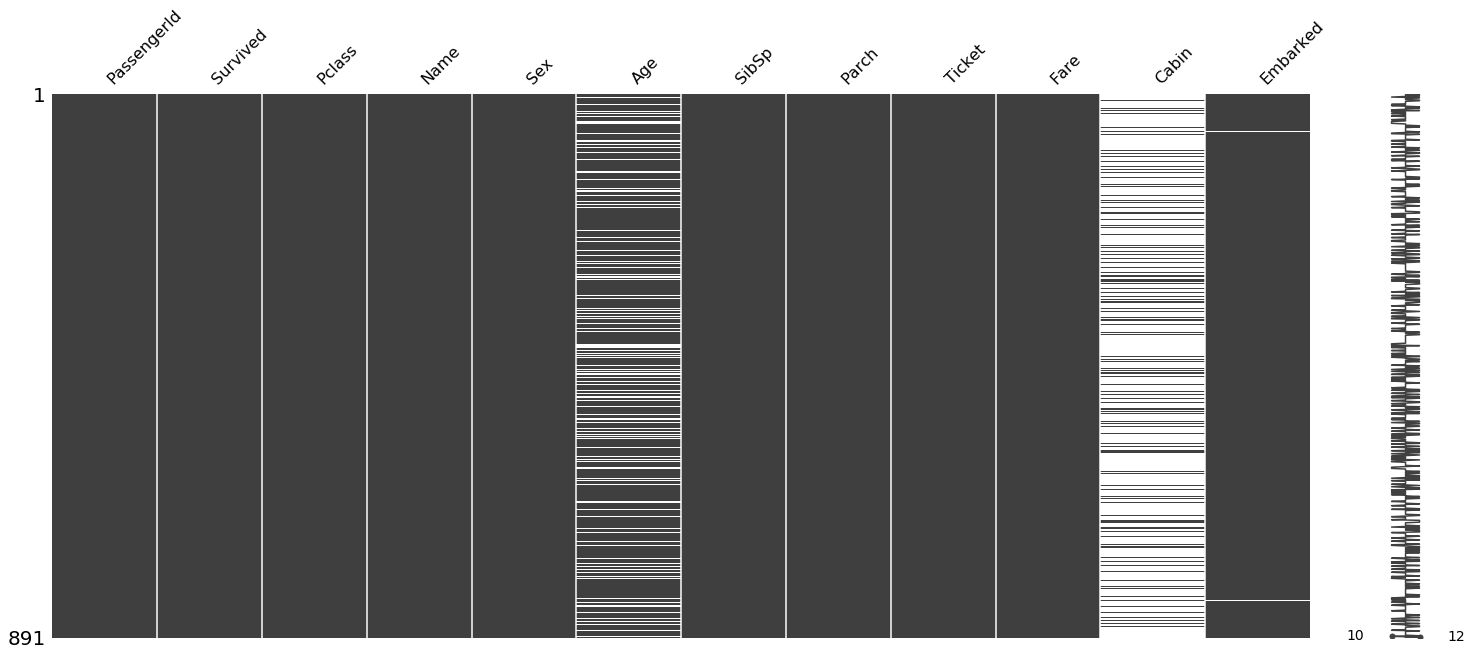

In [66]:
missingno.matrix(train)

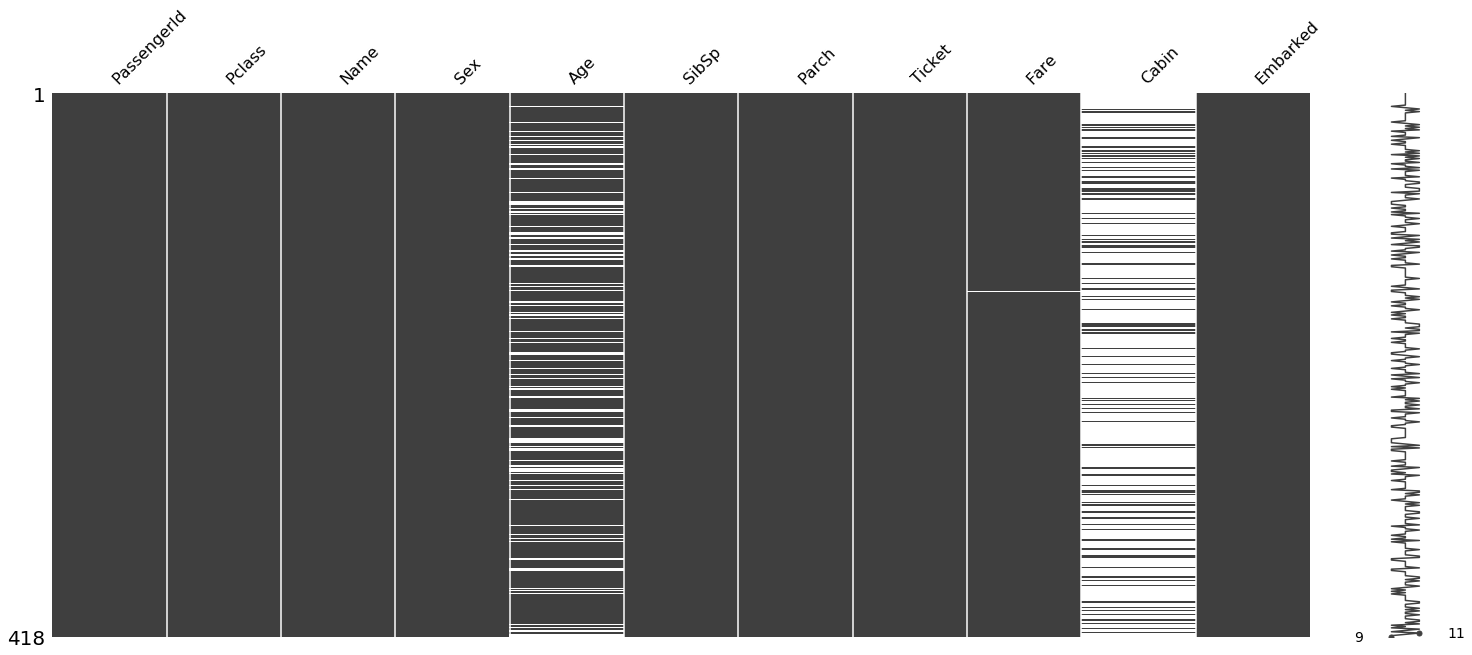

In [67]:
missingno.matrix(test)

# Now lets use summary statistics

In [68]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [69]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Feature analysis 
Categorical variables are "Sex", "Pclass" and "Embarked" In our dataset 

In [70]:
train.Sex.value_counts(dropna = False)

male      577
female    314
Name: Sex, dtype: int64

In [71]:
# Now lets calculate mean of surviving by using sex
train[["Sex","Survived"]].groupby("Sex",as_index = False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


Text(0.5, 1.0, 'Survival Probability by Gender')

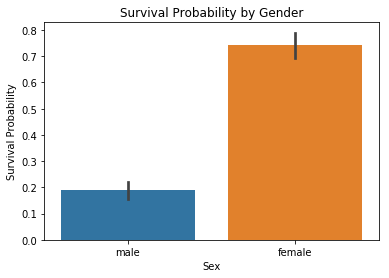

In [72]:
sns.barplot(x="Sex",y = "Survived",data = train)
plt.ylabel("Survival Probability")
plt.title("Survival Probability by Gender")

In [73]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [74]:
train[['Pclass','Survived']].groupby(["Pclass"],as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


# Now Lets visualize Pclass Survival 

Text(0, 0.5, 'Survival Probability')

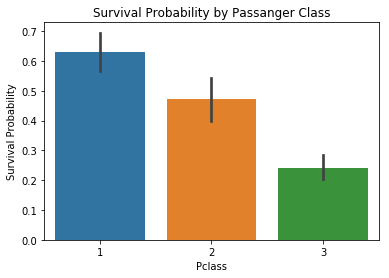

In [75]:
sns.barplot(x = 'Pclass', y = 'Survived', data = train)
plt.title("Survival Probability by Passanger Class")
plt.ylabel("Survival Probability")

# Survival by gender and passanger class

Text(0.5, 1.0, 'Survival probability by Passenger class and sex')

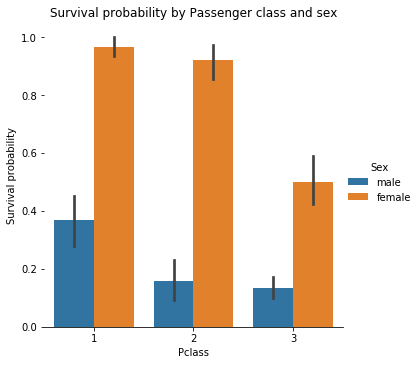

In [76]:
graph = sns.factorplot(x = "Pclass", y = "Survived", hue = "Sex", data = train, kind = "bar")
graph.despine(left= True)
plt.ylabel("Survival probability")
plt.title("Survival probability by Passenger class and sex")

# We can make conclusion from this graph that female passengers have higher survival probability. In addition first class passengers also have higher survival probability

# Now lets analyze Embarked feature

In [77]:
train.Embarked.value_counts(dropna = False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [78]:
train[["Embarked","Survived"]].groupby(['Embarked'],as_index= False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Text(0.5, 1.0, 'Survival probability by Embarked')

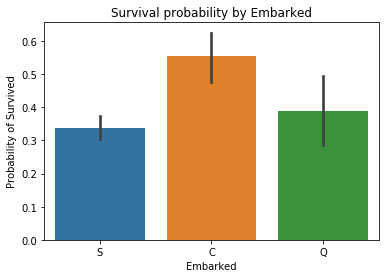

In [79]:
sns.barplot(x = "Embarked", y = "Survived", data = train)
plt.ylabel("Probability of Survived")
plt.title("Survival probability by Embarked")

# We see that the highest Embarked location is C, then Q and lastly S 
We can make hypothesis here. Lets assume First class Embarked from location C , that is why we have higher survival probability 

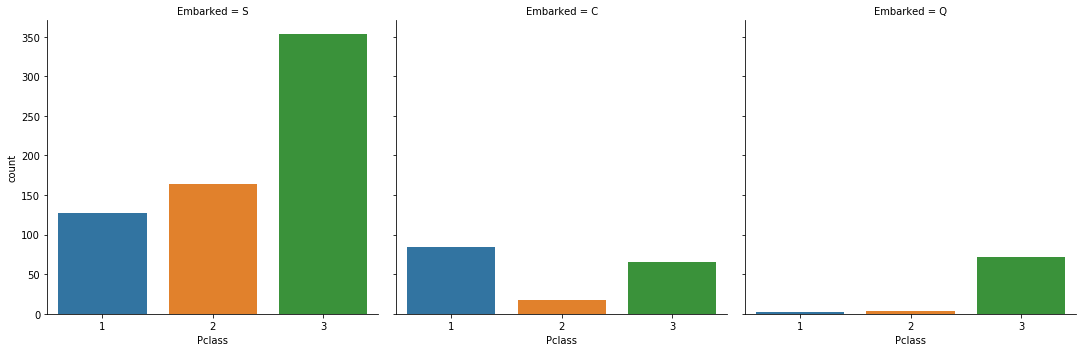

In [80]:
sns.factorplot("Pclass", col= "Embarked",data = train, kind = 'count')

# Time to remove outliers 
## I will use Tukey method 
Numerical Variables are in our datasets are "SibSp", "Parch", "Age", "Fare"
# Now lets vizualize them 

In [81]:
def plot_boxplot(df,ft):
    df.boxplot(column = [ft])
    plt.grid(False)
    plt.show

Text(0.5, 1.0, 'SibSp')

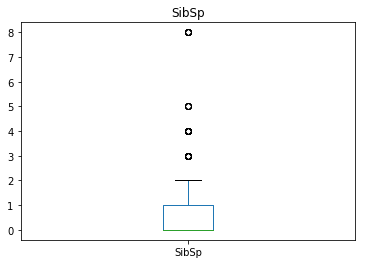

In [82]:
plot_boxplot(train,"SibSp")
plt.title("SibSp")

Text(0.5, 1.0, 'Age')

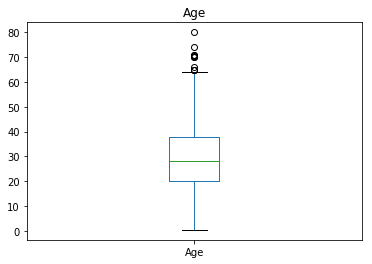

In [83]:
plot_boxplot(train,"Age")
plt.title("Age")

Text(0.5, 1.0, 'Parch')

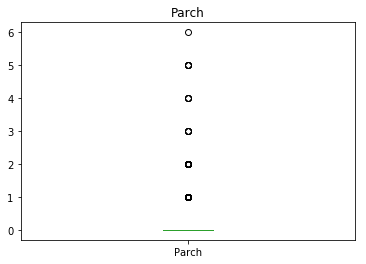

In [84]:
plot_boxplot(train,"Parch")
plt.title("Parch")

Text(0.5, 1.0, 'Fare')

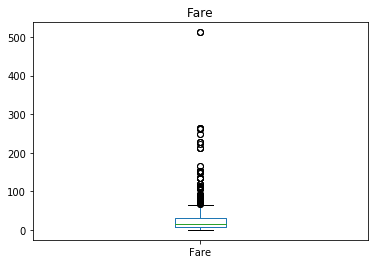

In [85]:
plot_boxplot(train,"Fare")
plt.title("Fare")

### Now time to remove outliers
###  I will use Tukey Method 

In [86]:
def detect_outliers(df,n,features):
    outlier_indices=[]
    
    for col in features:
        Q1 = np.percentile(df[col],25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3-Q1
        lower_bound = Q1 - (1.5 * IQR) 
        upper_bound = Q3 + (1.5 * IQR)
        
        
        outlier_list_col = df.index[( df[col] < lower_bound ) | ( df[col] > upper_bound ) ]
        outlier_indices.extend(outlier_list_col)
    outlier_indices= Counter(outlier_indices)
    multiple_outliers = list(key for key , value in outlier_indices.items() if value >n)
    return multiple_outliers

outliers_to_drop = detect_outliers(train,2,["Age","SibSp","Parch","Fare"])
print(outliers_to_drop)

[27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


### Now lets see outliers as a df

In [87]:
train.loc[outliers_to_drop,:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [88]:
# Dropping outliers
print("Before dropping",len(train))
train = train.drop(outliers_to_drop,axis = 0).reset_index(drop= True)
print("After dropping",len(train))


Before dropping 891
After dropping 881


### Numerical variables correlation with survival 

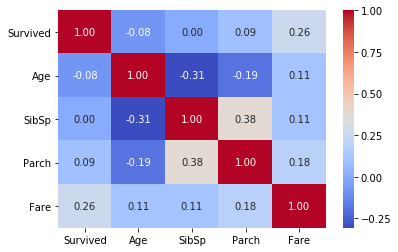

In [90]:
sns.heatmap(train[["Survived","Age","SibSp","Parch","Fare"]].corr(),annot=True, fmt = '.2f',cmap= 'coolwarm' )

### Numerical Variable: SibSp

In [91]:
train["SibSp"].value_counts(dropna = False)

0    608
1    209
2     28
4     18
3     13
5      5
Name: SibSp, dtype: int64

In [92]:
# Mean of Survival 
train[["SibSp","Survived"]].groupby('SibSp',as_index = False).mean().sort_values(by = "Survived", ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
4,4,0.166667
3,3,0.153846
5,5,0.000000


Text(0.5, 1.0, 'Survival Probability by SibSp')

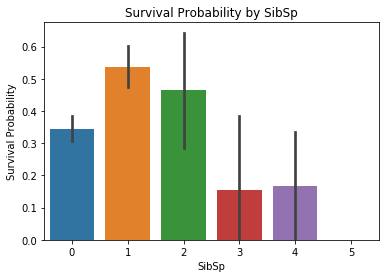

In [93]:
sns.barplot(x = "SibSp",y ="Survived", data = train)
plt.ylabel("Survival Probability")
plt.title("Survival Probability by SibSp")

### Numerical Value: Parch

In [96]:
train["Parch"].value_counts(dropna = False)

0    678
1    118
2     70
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [98]:
# Mean of Survival 
train[["Parch","Survived"]].groupby('Parch',as_index = False).mean().sort_values(by = "Survived", ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.542857
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Text(0.5, 1.0, 'Survival Probability by Parch')

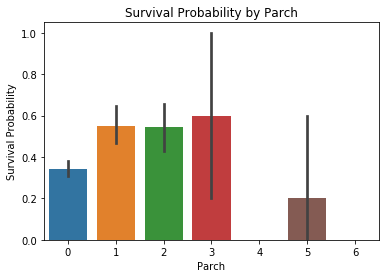

In [99]:
sns.barplot(x = "Parch",y ="Survived", data = train)
plt.ylabel("Survival Probability")
plt.title("Survival Probability by Parch")

### Numerical value: Age

In [100]:
train["Age"].isnull().sum()

170

# Passengers Age Distribution



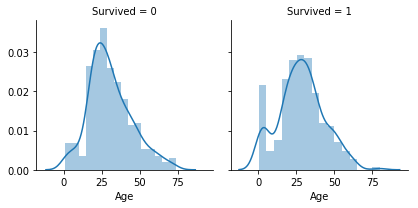

In [112]:
g = sns.FacetGrid(train,col = "Survived")
g.map(sns.distplot,"Age")

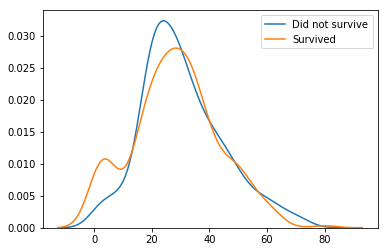

In [113]:
sns.kdeplot(train["Age"][train["Survived"] ==0],label = "Did not survive")
sns.kdeplot(train["Age"][train["Survived"] ==1],label = "Survived")

### Numerical value: Fare

In [114]:
train.Fare.isnull().sum()

0

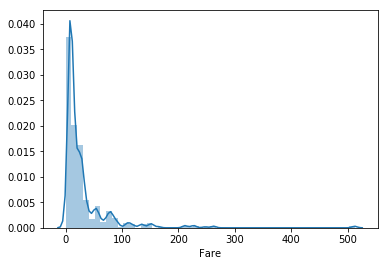

In [119]:
# Passengers Fare distribution
sns.distplot(train['Fare'],label = 'Skewness: %.2f'%(train['Fare'].skew()))